In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from glob import glob
import os

# Deeptools analysis results

The main purpose of this notebook is to analyse the "coverage counts" and other summary files produced by deepTools.

# Analysis option
Adjust the following flag to include or exclude the Swift long insert libraries from the analysis.

In [64]:
INCLUDE_SWIFT_LONG_LIBS = False

In [65]:
cov_100ng_matrix = pd.read_table("50_deeptools_summary/coverage_all_aa_100ng.txt", skiprows=1)

/ypool/applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [66]:
cov_100ng_matrix.columns = [
    c.replace("'", "").replace("-aa_DS_MD.bam", "")
    for c in cov_100ng_matrix.columns
]
if not INCLUDE_SWIFT_LONG_LIBS:
    cov_100ng_matrix = cov_100ng_matrix[[c for c in cov_100ng_matrix.columns if not c.startswith("Swiftlong")]]

In [67]:
cov_100ng_matrix.head()

,#chr,start,end,Kapa-100ng-1,Kapa-100ng-2,Kapa-100ng-3,Kapa-100ng-4,NEB-100ng-1,NEB-100ng-2,NEB-100ng-3,...,Nextera-100ng-3,Nextera-100ng-4,Quanta-100ng-1,Quanta-100ng-2,Quanta-100ng-3,Quanta-100ng-4,Swift2S-100ng-1,Swift2S-100ng-2,Swift2S-100ng-3,Swift2S-100ng-4
0,chr1,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,chr1,3099,3100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,chr1,6198,6199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,chr1,9297,9298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,chr1,12396,12397,21.0,33.0,27.0,26.0,21.0,23.0,21.0,...,29.0,23.0,19.0,7.0,24.0,19.0,28.0,12.0,26.0,21.0


# Utility function

In [68]:
def savefig(name, main=True):
    if main:
        if INCLUDE_SWIFT_LONG_LIBS:
            plt.savefig('plots-main-withLong/{}'.format(name))
        else:
            plt.savefig('plots-main/{}'.format(name))
    else:
        if INCLUDE_SWIFT_LONG_LIBS:
            plt.savefig('plots-suppl-withLong/{}'.format(name))
        else:
            plt.savefig('plots-suppl/{}'.format(name))

In [69]:
columns = cov_100ng_matrix.columns[3:]
counts_matrix = cov_100ng_matrix.iloc[:, 3:].apply(pd.value_counts)
counts_long_100 = counts_matrix.reset_index().rename({'index': 'Coverage'}, axis=1).melt(id_vars=['Coverage'], value_name="NumReads")
counts_long_100['Kit'] = counts_long_100.variable.str.split("-").str.get(0)
counts_long_100['Replicate'] = counts_long_100.variable.str.split("-").str.get(2)

In [70]:
def reverse_cum_sum(df):
    cum = df.sort_values("Coverage", ascending=False).NumReads.cumsum()
    df['CumulativeNumReads'] = cum
    return df


counts_long_100 = counts_long_100.groupby(['Kit', 'Replicate']).apply(reverse_cum_sum)

In [71]:
counts_long_100.head()

,Coverage,variable,NumReads,Kit,Replicate,CumulativeNumReads
0,0.0,Kapa-100ng-1,68043.0,Kapa,1,1001412.0
1,1.0,Kapa-100ng-1,14940.0,Kapa,1,933369.0
2,2.0,Kapa-100ng-1,31478.0,Kapa,1,918429.0
3,3.0,Kapa-100ng-1,52056.0,Kapa,1,886951.0
4,4.0,Kapa-100ng-1,73145.0,Kapa,1,834895.0


In [72]:
counts_medium_100 = counts_long_100[counts_long_100.Coverage < 20]

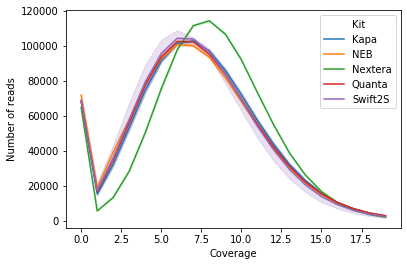

In [73]:
plt.figure()
sns.lineplot(x='Coverage', y='NumReads', hue='Kit', data=counts_medium_100)
plt.ylabel("Number of reads")
savefig("coverage_deeptools_100ng.pdf")

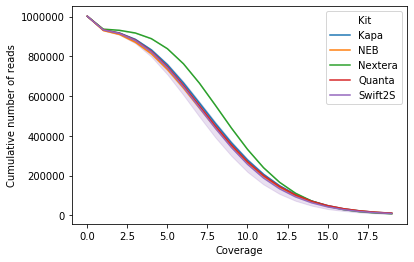

In [74]:
plt.figure()
sns.lineplot(x='Coverage', y='CumulativeNumReads', hue='Kit', data=counts_medium_100)
plt.ylabel("Cumulative number of reads")
savefig("coverage_deeptools_cumulative_100ng.pdf", False)

/ypool/applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


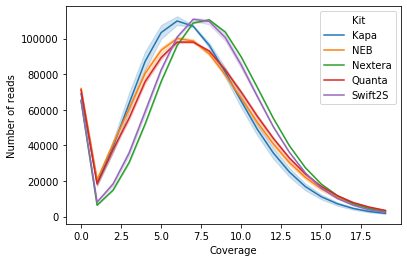

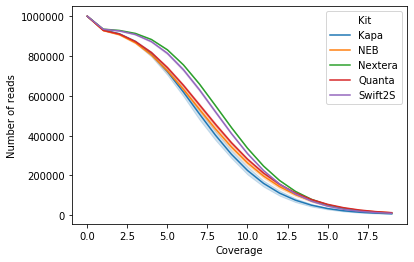

In [75]:
cov_10ng_matrix = pd.read_table("50_deeptools_summary/coverage_all_aa_10ng.txt", skiprows=1)
cov_10ng_matrix.columns = [
    c.replace("'", "").replace("-aa_DS_MD.bam", "")
    for c in cov_10ng_matrix.columns
]
if not INCLUDE_SWIFT_LONG_LIBS:
    cov_10ng_matrix = cov_10ng_matrix[[c for c in cov_10ng_matrix.columns if not c.startswith("Swiftlong")]]
columns = cov_10ng_matrix.columns[3:]
counts_matrix = cov_10ng_matrix.iloc[:, 3:].apply(pd.value_counts)
counts_long_10 = counts_matrix.reset_index().rename({'index': 'Coverage'}, axis=1).melt(id_vars=['Coverage'], value_name="NumReads")
counts_long_10['Kit'] = counts_long_10.variable.str.split("-").str.get(0)
counts_long_10['Replicate'] = counts_long_10.variable.str.split("-").str.get(2)
counts_long_10 = counts_long_10.groupby(['Kit', 'Replicate']).apply(reverse_cum_sum)
counts_medium_10 = counts_long_10[counts_long_10.Coverage < 20]
plt.figure()
sns.lineplot(x='Coverage', y='NumReads', hue='Kit', data=counts_medium_10)
plt.ylabel("Number of reads")
savefig("coverage_deeptools_10ng.pdf")
plt.figure()
sns.lineplot(x='Coverage', y='CumulativeNumReads', hue='Kit', data=counts_medium_10)
plt.ylabel("Number of reads")
savefig("coverage_deeptools_cumulative_10ng.pdf", False)

In [76]:
counts_medium_100["Conc"] = "100ng"
counts_medium_10["Conc"] = "10ng"
counts_medium = pd.concat((counts_medium_100, counts_medium_10))
counts_medium['Kit'] = pd.Categorical(counts_medium.Kit)

/ypool/applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/ypool/applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


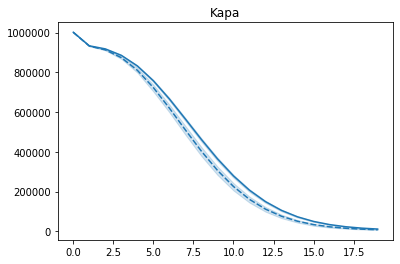

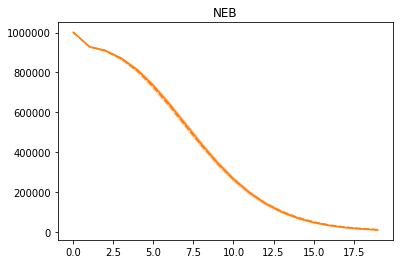

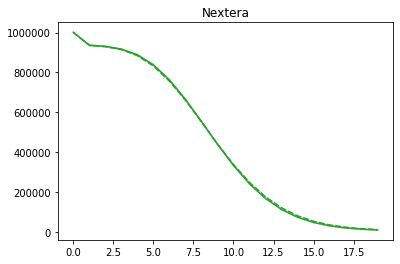

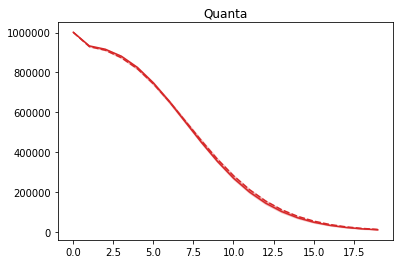

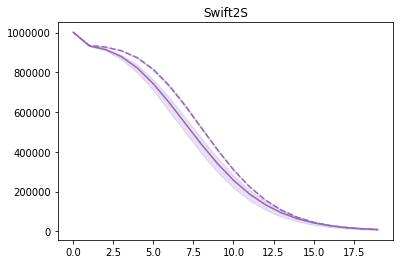

In [77]:
for kit in counts_medium.Kit.cat.categories:
    plt.figure()
    sns.lineplot(x='Coverage', y='CumulativeNumReads', hue='Kit', style="Conc",
                 data=counts_medium[counts_medium.Kit == kit], legend=False)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(kit)
    savefig("coverage_deeptools_{}.pdf".format(kit), False)

## Fragment lengths

In [78]:
#insertSizeDatas = [pd.read_csv(q) for q in ["50_deeptools_summary/insertSize_all_aa_100ng.txt", "50_deeptools_summary/insertSize_all_aa_10ng.txt"]]
insertSizeDatas = [pd.read_csv(
                        "50_deeptools_summary/insertSize_all_aa_{}.txt".format(conc),
                        sep="\t", skiprows=1
                        ).assign(Conc=conc)
                   for conc in ["10ng", "100ng"]]

insertSizeData = pd.concat(insertSizeDatas)
insertSizeData[['Kit', 'Replicate']] = insertSizeData.Sample.str.extract(r"30_downsample/([a-zA-Z0-9]+)-100?ng-([1234])-aa_DS_MD\.bam")
if not INCLUDE_SWIFT_LONG_LIBS:
    insertSizeData = insertSizeData[insertSizeData.Kit != 'Swiftlong']
shorterInsertSize = insertSizeData[insertSizeData.Size < 800]

In [79]:
shorterInsertSize.head()

,Size,Occurrences,Sample,Conc,Kit,Replicate
0,0,201,30_downsample/Kapa-10ng-1-aa_DS_MD.bam,10ng,Kapa,1
1,2,2,30_downsample/Kapa-10ng-1-aa_DS_MD.bam,10ng,Kapa,1
2,3,1,30_downsample/Kapa-10ng-1-aa_DS_MD.bam,10ng,Kapa,1
3,4,1,30_downsample/Kapa-10ng-1-aa_DS_MD.bam,10ng,Kapa,1
4,5,2,30_downsample/Kapa-10ng-1-aa_DS_MD.bam,10ng,Kapa,1


`n_boot` -- Number of bootstraps for computation of confidence interval. More `n_boot` gives smooth plots, but takes longer.

In [80]:
n_boot = 20

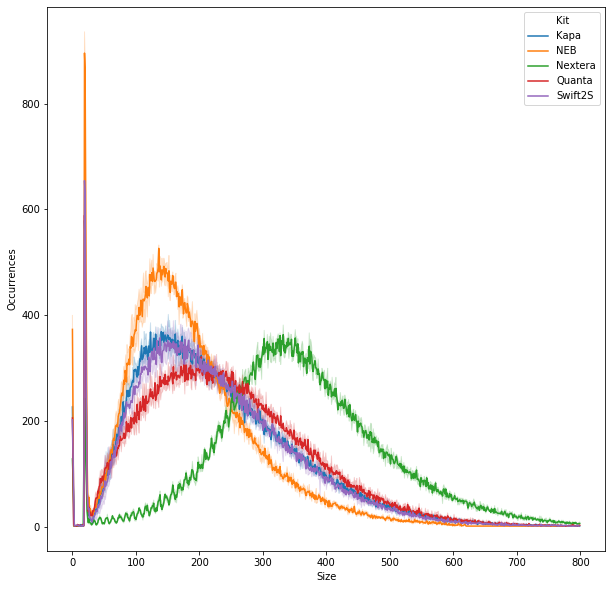

In [81]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Size", y="Occurrences", hue="Kit", data=shorterInsertSize[shorterInsertSize.Conc == "100ng"], n_boot=n_boot)
savefig("insert_size_deeptools_100ng.pdf")

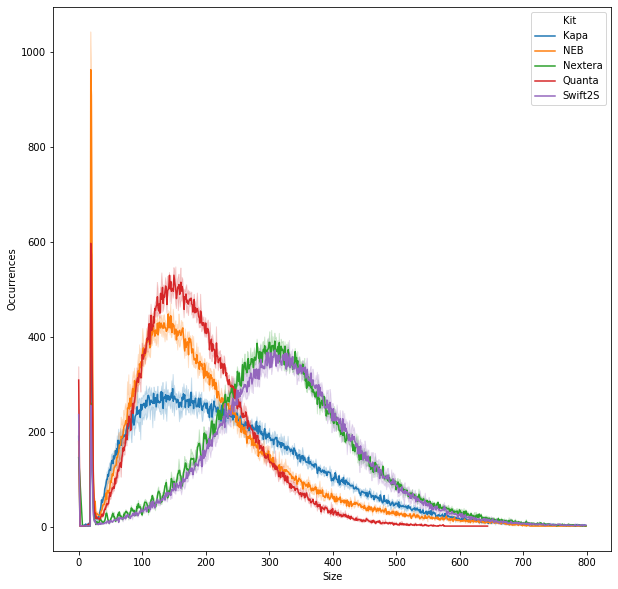

In [82]:
plt.figure(figsize=(10,10))
sns.lineplot(x="Size", y="Occurrences", hue="Kit", data=shorterInsertSize[shorterInsertSize.Conc == "10ng"], n_boot=n_boot)
savefig("insert_size_deeptools_10ng.pdf")

## Summary NPZ file

In [83]:
import numpy as np

In [84]:
data = np.load('50_deeptools_summary/summary_aa_all.npz')

In [85]:
print(list(data))

['labels', 'matrix']


In [86]:
print(data['labels'][:5])

['Swiftlong-100ng-4-aa.bw' 'Swiftlong-10ng-4-aa.bw'
 'Swiftlong-100ng-1-aa.bw' 'Swiftlong-10ng-2-aa.bw'
 'Swiftlong-10ng-1-aa.bw']


In [87]:
print(data['matrix'].shape)

(310114, 8)



## GC Content

In [88]:
gc_content_files = glob(os.path.join("30_downsample", "qualimap", "*-aa_DS", "raw_data_qualimapReport", "mapped_reads_gc-content_distribution.txt"))

In [89]:
gc_data = pd.concat(map(lambda x: pd.read_csv(x, sep="\t").assign(File=x), gc_content_files))
gc_data.head(n=1)

,#GC Content (%),Sample,File
0,1.0,0.00001,30_downsample/qualimap/NEB-100ng-4-aa_DS/raw_d...


In [90]:
sample_file_name = lambda path: os.path.basename(os.path.dirname(os.path.dirname(path)))
gc_data['Kit'] = pd.Categorical(gc_data.File.apply(lambda x: sample_file_name(x).split("-")[0]))
gc_data['Conc'] = pd.Categorical(gc_data.File.apply(lambda x: sample_file_name(x).split("-")[1]))
gc_data['Replicate'] = pd.Categorical(gc_data.File.apply(lambda x: sample_file_name(x).split("-")[2]))
gc_data.head(n=1)

,#GC Content (%),Sample,File,Kit,Conc,Replicate
0,1.0,0.00001,30_downsample/qualimap/NEB-100ng-4-aa_DS/raw_d...,NEB,100ng,4


10ng


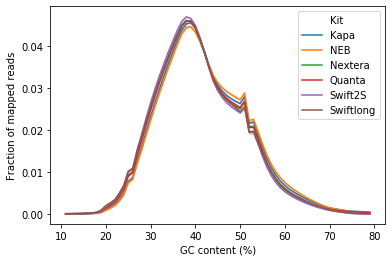

100ng


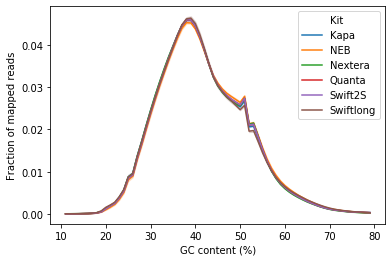

In [91]:
for conc in ["10ng", "100ng"]:
    sns.lineplot(data=gc_data[
                            (gc_data.Conc == conc) & 
                            (gc_data["#GC Content (%)"] > 10) & 
                            (gc_data["#GC Content (%)"] < 80)
                            ], 
                 x="#GC Content (%)", y="Sample", hue="Kit")
    plt.xlabel("GC content (%)")
    plt.ylabel("Fraction of mapped reads")
    savefig("gc_content_{}.pdf".format(conc))
    print(conc)
    plt.show()

In [92]:
weighted_means = gc_data.groupby(["Kit", "Conc", "Replicate"]).apply(lambda x: (x['#GC Content (%)'] * x.Sample).sum() / x.Sample.sum())
weighted_means = weighted_means.reset_index()
weighted_means.head()
#sns.boxplot(data=weighted_means, x="Kit", y=0, hue="Conc")

,Kit,Conc,Replicate,0
0,Kapa,100ng,1,41.578663
1,Kapa,100ng,2,41.620892
2,Kapa,100ng,3,41.655683
3,Kapa,100ng,4,41.533452
4,Kapa,10ng,1,42.084715


No handles with labels found to put in legend.


100ng


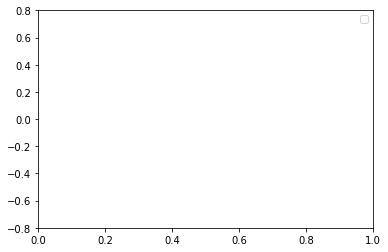

No handles with labels found to put in legend.


10ng


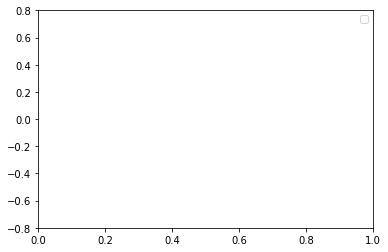

In [93]:
gc_matrix_files = glob(os.path.join("40_gc_bias", "*.txt"))

# Note here is a couple of references to the previous, unrelated data frame, to preserve
# order and colour of kit and conc
kit_index = dict((v, i) for i, v in enumerate(gc_data.Kit.cat.categories))

for conc in gc_data.Conc.cat.categories:
    print(conc)
    y_max, y_min = 0, 1
    legend = set()
    for path in gc_matrix_files:
        if "-{}-".format(conc) in path:
            frequencies = np.loadtxt(path)
            kit = os.path.basename(path).split("-")[0]
            x = np.linspace(0, 100, frequencies.shape[0])
            y = np.log2(frequencies[:, 2])
            if kit in legend:
                plt.plot(x, y, color=sns.color_palette()[kit_index[kit]])
            else:
                plt.plot(x, y, color=sns.color_palette()[kit_index[kit]], label=kit)
                legend.add(kit)
            plt.xlabel('GC content (%)')
            plt.ylabel('log2(ratio) observed/expected reads')
            plt.xlim(20, 70)
            y_max = max(y_max, max(y[np.where(x >= 20)[0][0]:np.where(x <= 70)[0][-1] + 1]))
            y_min = min(y_min, min(y[np.where(x >= 20)[0][0]:np.where(x <= 70)[0][-1] + 1]))
    if y_max > 0:
        y_max *= 1.1
    else:
        y_max *= 0.9
    if y_min < 0:
        y_min *= 1.1
    else:
        y_min *= 0.9
    plt.ylim(-0.8, 0.8) # and just ignoring max/min anyway
    plt.legend()
    #savefig("gc_bias_{}.pdf".format(conc))
    plt.show()
